## Lab 10: Linear regression in Python 

- Objectives 
  - Single and multiple linear regression in python 
  - Regression model evaluation 
---

Step 1: Some exploratory data analysis 
- About dataset: a CSV file which contains the hours studeid and the scores obtained based on those hours
- Explore the data first and make some assumptions based on observations 


In [3]:
import pandas as pd 
df = pd.read_csv('student_scores.csv')
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
import cufflinks as cf 
df.iplot(kind='scatter',x='Hours',y='Scores',mode ='markers')

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


------- 
Step 2: Simple linear regression 
- Train_test_split() method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size. 
  - The test_size is the percentage of the overall data we'll be using for testing
  - The method randomly takes samples respecting the percentage we've defined, but respects the X-y pairs, lest the sampling would totally mix up the relationship. 
  - Since the sampling process is inherently random, we will always have different results when running the method. To be able to have the same results, or reproducible results, we can define a constant called SEED that has the value of the meaning of life (42)
    - The seed can be any integer, and is used as the seed for the random sampler. The seed is usually random, netting different results. However, if you set it manually, the sampler will return the same results. It's convention to use 42 as the seed as a reference to the popular novel series "The Hitchhiker’s Guide to the Galaxy". :)

In [18]:
y = df['Scores'].values.reshape(-1, 1)
x = df['Hours'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
seed=42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

[2.82689235]
[[9.68207815]]


In [19]:
# making predictions 
def calc(slope,intercept,hours):
      return slope*hours+intercept
score=calc(regressor.coef_,regressor.intercept_,9.5)
score

array([[94.80663482]])

In [21]:
# make predictions 
score=regressor.predict([[9.5]])
score

array([[94.80663482]])

In [24]:
# make predictions on the test data 
y_pred=regressor.predict(x_test)
y_pred
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


----
Step 3： multiple linear regression 

In [37]:
import pandas as pd
df = pd.read_csv("petrol_consumption.csv")
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

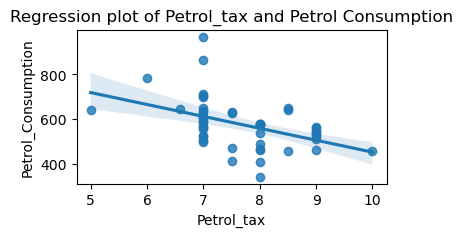

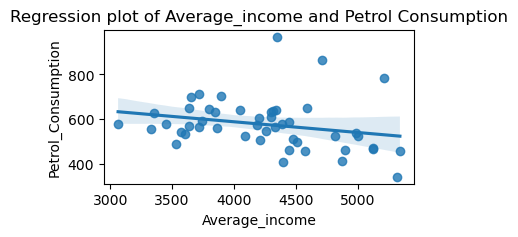

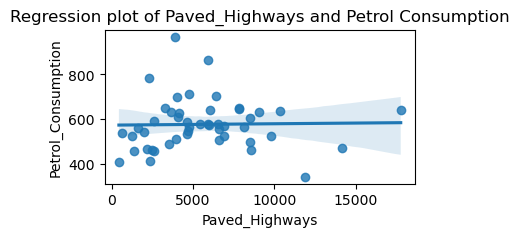

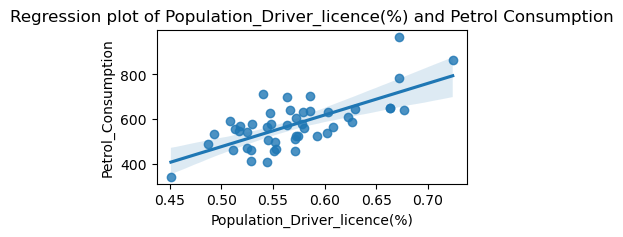

In [39]:
import seaborn as sns 
variables=['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']
for var in variables:
      plt.figure(figsize=(4,2))
      sns.regplot(x=var,y='Petrol_Consumption',data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

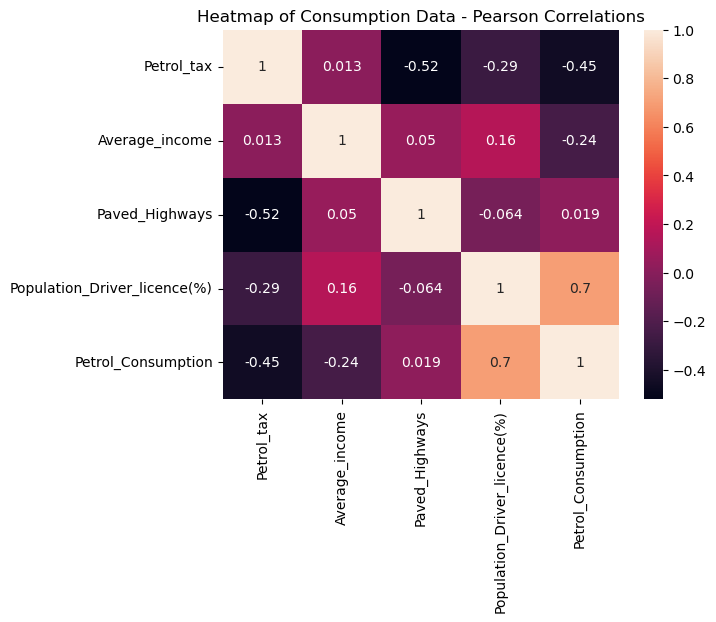

In [40]:
sns.heatmap(df.corr(),annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [42]:
# multiple regression 
y=df['Petrol_Consumption']
x=df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_,regressor.coef_)

361.4508790666836 [-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]


In [47]:
feature_names = x.columns
model_coefficients=regressor.coef_
coefficients_df=pd.DataFrame(data=model_coefficients,index=feature_names,columns=['Coefficient value'])
coefficients_df

,Coefficient value
Average_income,-0.056536
Paved_Highways,-0.004382
Population_Driver_licence(%),1346.869298
Petrol_tax,-36.993746


In [51]:
# make predictions 
y_pred=regressor.predict(x_test)
results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
results

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630
